# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import sys
sys.path.append('../src')  
from dbscan import DBSCAN
from utils import plot_clusters

In [ ]:
# Load and preprocess data
df = pd.read_csv('../data/Country-data.csv')
countries = df['country']
X = df.drop('country', axis=1)

# Standardize features (critical for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

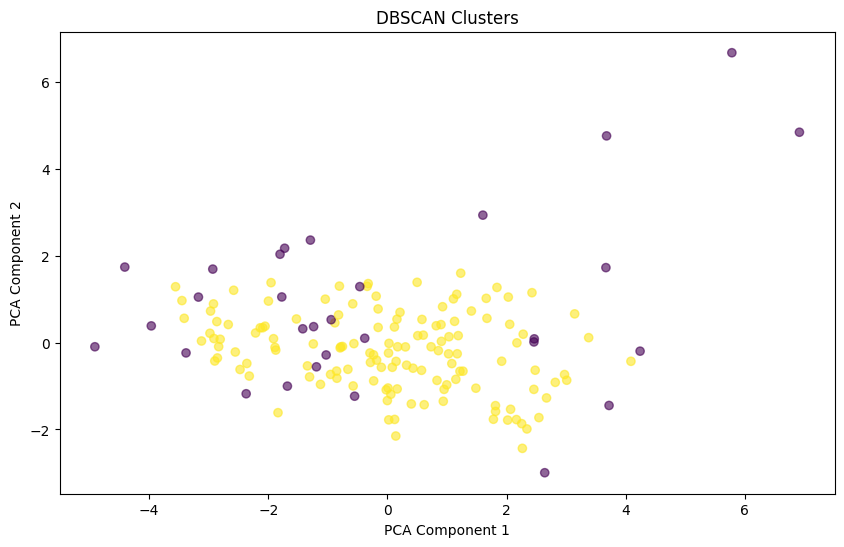

Noise countries (outliers): ['Angola', 'Brunei', 'Central African Republic', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Equatorial Guinea', 'Gabon', 'Haiti', 'Iraq', 'Ireland', 'Kiribati', 'Kuwait', 'Lesotho', 'Liberia', 'Luxembourg', 'Malta', 'Micronesia, Fed. Sts.', 'Mongolia', 'Nigeria', 'Norway', 'Qatar', 'Rwanda', 'Seychelles', 'Sierra Leone', 'Singapore', 'South Africa', 'Timor-Leste', 'Turkmenistan', 'United States', 'Venezuela']


In [18]:
# Fit DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan.fit(X_scaled)

# Visualize clusters (use PCA for 2D projection)
plot_clusters(X_scaled, dbscan.labels_, None, 'DBSCAN Clusters')

# Analyze noise points (label = -1)
noise_countries = countries[dbscan.labels_ == -1]
print(f"Noise countries (outliers): {noise_countries.tolist()}")

### Scikit-Learn DBSCAN

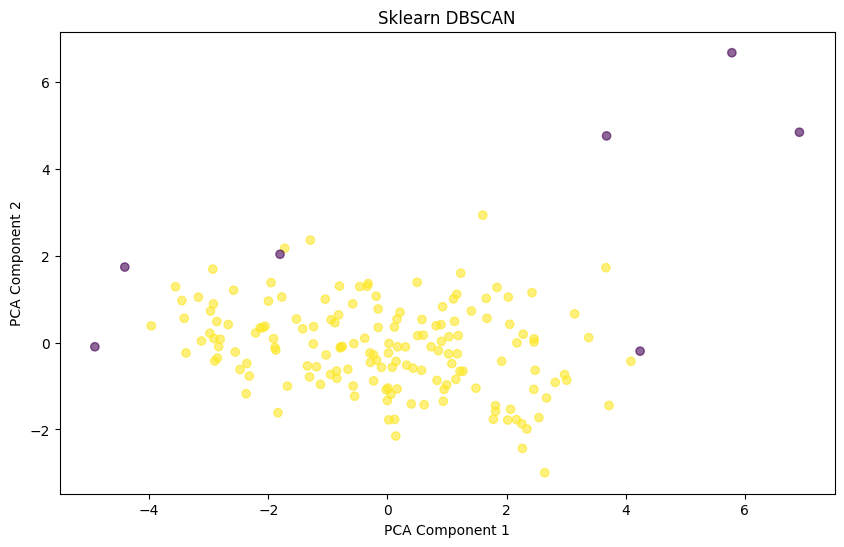

In [21]:
from sklearn.cluster import DBSCAN as SKDBSCAN

sk_dbscan = SKDBSCAN(eps=1.5, min_samples=5)
sk_labels = sk_dbscan.fit_predict(X_scaled)
plot_clusters(X_scaled, sk_labels, None, 'Sklearn DBSCAN')